The dataset below is of the supply chain operations of hardware manufacturing company ATNT.

The company tasked us with deducing all patterns and trends that will help the company streamline its supply chain operations to be more cost-effective, time conveniet in terms of deliveries and profit maximization as well as understand the average turnover time of the goods.

By the end of this ATNT will be able to:
    1. Predict average turnover time
    
    2. Analyze how each sales team is performing
    
    3. Analyze performance of each sale channel
    
    4. Deduce strongest and weakest performing areas
    
    5. Deduce average delivery time for each channel
    
    6. Deduce impact of delivery time on profits
    

The dataset was sourced from Kaggle.

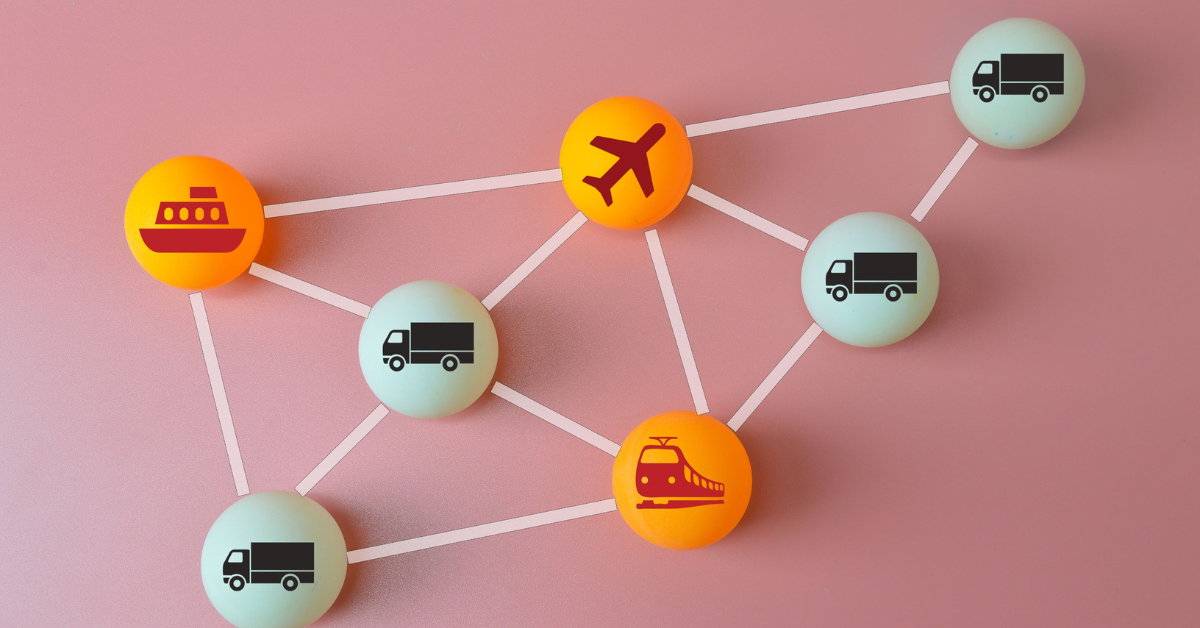

In [1]:
#load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load the dataset into a dataframe for analysis
df=pd.read_csv("C:\\Users\\raymo\\Downloads\\suppl_chain_db\\US_Regional_Sales_Data.csv")

In [4]:
#have a look at the dataframe to prepare wrangling
df.head(5)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/2018,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/2018,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/2018,7/6/2018,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/2018,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"


**DATA CLEANING**

In [6]:
#check for null values
df.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

There are no null values in the dataset

In [3]:
#check how many currencies there are in the dataset
df['CurrencyCode'].unique()

array(['USD'], dtype=object)

In [4]:
#there is one currency USD so we can drop the currency field
df.drop('CurrencyCode',axis=1,inplace=True)
df.drop('_StoreID',axis=1,inplace=True)

**Data Transformation**

In [10]:
#check the field datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   _SalesTeamID      7991 non-null   int64  
 8   _CustomerID       7991 non-null   int64  
 9   _StoreID          7991 non-null   int64  
 10  _ProductID        7991 non-null   int64  
 11  Order Quantity    7991 non-null   int64  
 12  Discount Applied  7991 non-null   float64
 13  Unit Cost         7991 non-null   object 
 14  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 936.6+ KB


In [5]:
#we'll use info above to change fields like date into necessary data types
#first convert to date
df['ProcuredDate']=pd.to_datetime(df['ProcuredDate']).dt.strftime('%d/%m/%Y')
df['OrderDate']=pd.to_datetime(df['OrderDate']).dt.strftime('%d/%m/%Y')
df['ShipDate']=pd.to_datetime(df['ShipDate']).dt.strftime('%d/%m/%Y')
df['DeliveryDate']=pd.to_datetime(df['DeliveryDate']).dt.strftime('%d/%m/%Y')

In [6]:
#re-connvert to datetime to ensure consistency

df['OrderDate']=pd.to_datetime(df['OrderDate'], format='%d/%m/%Y')
df['ShipDate']=pd.to_datetime(df['ShipDate'], format='%d/%m/%Y')
df['ProcuredDate']=pd.to_datetime(df['ProcuredDate'], format='%d/%m/%Y')
df['DeliveryDate']=pd.to_datetime(df['DeliveryDate'], format='%d/%m/%Y')

In [7]:
#change prices to integers
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'].str.replace('$', '').str.replace(',', ''))
df['Unit Price'] = pd.to_numeric(df['Unit Price'].str.replace('$', '').str.replace(',', ''))

C:\Users\raymo\AppData\Local\Temp\ipykernel_4220\3016871906.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Unit Cost'] = pd.to_numeric(df['Unit Cost'].str.replace('$', '').str.replace(',', ''))
C:\Users\raymo\AppData\Local\Temp\ipykernel_4220\3016871906.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Unit Price'] = pd.to_numeric(df['Unit Price'].str.replace('$', '').str.replace(',', ''))


In [25]:
df.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
_SalesTeamID                 int64
_CustomerID                  int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Cost                  float64
Unit Price                 float64
dtype: object

In [26]:
df.head(5)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,12,5,0.08,1001.18,1963.1
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-02-07,14,20,27,3,0.08,3348.66,3939.6
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-01-07,21,16,16,1,0.05,781.22,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-02-06,2018-07-06,28,48,23,8,0.08,1464.69,2324.9
4,SO - 000105,Distributor,WARE-NMK1003,2018-10-04,2018-05-31,2018-06-16,2018-06-26,22,49,26,8,0.10,1476.14,1822.4


**Data Analysis**

In [8]:
#add necessary filds that carry extra information
df['Delivery_time'] = (df['DeliveryDate'] - df['OrderDate']).dt.days.abs() #how long does it take to deliver
df['Inventory_turnover_time'] = (df['OrderDate'] - df['ProcuredDate']).dt.days.abs() #how long it takes from shelf to consumer
df['Fulfillment_time'] = (df['ShipDate'] - df['OrderDate']).dt.days.abs() #time on the warehouse
df['Trucking_time'] = (df['DeliveryDate'] - df['ShipDate']).dt.days.abs() #time on the road

In [9]:
#introduce profits
df['Profit']=((df['Unit Price']-df['Unit Cost'])*df['Order Quantity'])-df['Discount Applied']

In [10]:
df['Revenues']=((df['Unit Price'])*df['Order Quantity'])-df['Discount Applied']

In [11]:
df.head(5)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time,Inventory_turnover_time,Fulfillment_time,Trucking_time,Profit,Revenues
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,12,5,0.08,1001.18,1963.1,19,151,14,5,4809.52,9815.42
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-02-07,14,20,27,3,0.08,3348.66,3939.6,113,151,22,135,1772.74,11818.72
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-01-07,21,16,16,1,0.05,781.22,1775.5,144,151,21,165,994.23,1775.45
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-02-06,2018-07-06,28,48,23,8,0.08,1464.69,2324.9,36,151,114,150,6881.60,18599.12
4,SO - 000105,Distributor,WARE-NMK1003,2018-10-04,2018-05-31,2018-06-16,2018-06-26,22,49,26,8,0.10,1476.14,1822.4,26,126,16,10,2769.98,14579.10


**Statistical methods**

In [35]:
#let's apply various measures of tendencies
df.describe()

,_SalesTeamID,_CustomerID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time,Inventory_turnover_time,Fulfillment_time,Trucking_time,Profit,Revenues
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,23.771743,4.525341,0.115649,1431.911513,2284.536504,87.839945,148.585158,90.068827,72.997747,3863.563205,10348.116938
std,7.986086,14.414883,13.526545,2.312631,0.085018,1112.413063,1673.096364,86.726965,132.955637,87.703082,85.504348,4196.854403,10021.419172
min,1.000000,1.000000,1.000000,1.000000,0.050000,68.680000,167.500000,1.000000,2.000000,1.000000,1.000000,24.820000,167.100000
25%,8.000000,13.000000,12.000000,3.000000,0.050000,606.120000,1031.800000,24.000000,68.000000,18.000000,5.000000,1013.410000,3195.850000
50%,14.000000,25.000000,24.000000,5.000000,0.080000,1080.580000,1849.200000,42.000000,105.000000,59.000000,31.000000,2398.300000,6994.700000
75%,21.000000,38.000000,36.000000,7.000000,0.150000,2040.250000,3611.300000,138.000000,159.000000,149.000000,123.000000,5094.035000,14780.100000
max,28.000000,50.000000,47.000000,8.000000,0.400000,5498.560000,6566.000000,567.000000,693.000000,352.000000,323.000000,30905.360000,52313.550000


From description above, it takes:
   
   1. 148 Days on average to move goods from shelf to consumer
   
   2. 72 days to process an order
   
   3. 87 days to deliver a product
   
   4. 72 days on the road/air/sea

**Profits analysis**

(i) By Sales Channel

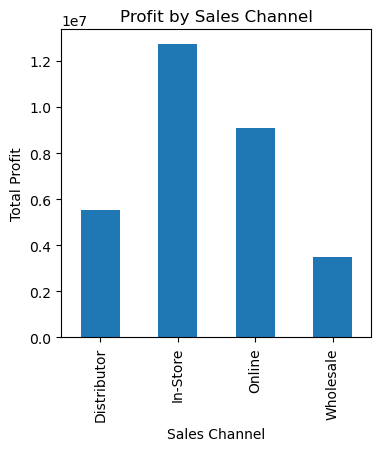

In [19]:
#analyze profits by channel,team,product,warehouse
#by channel
profit_by_channel = df.groupby('Sales Channel')['Profit'].sum()
#visualize results
plt.figure(figsize=(4, 4))
profit_by_channel.plot(kind='bar')
plt.title('Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.show()

In [44]:
profit_by_channel

Sales Channel
Distributor     5528500.52
In-Store       12734682.78
Online          9097727.56
Wholesale       3512822.71
Name: Profit, dtype: float64

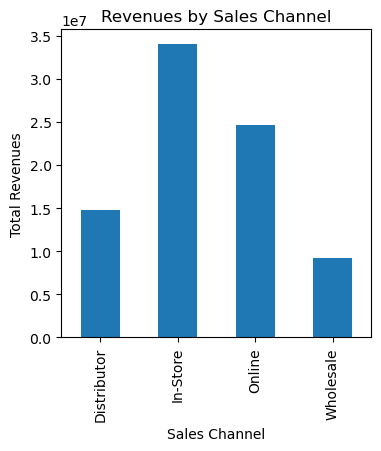

In [18]:
#deduce revenues per channel to see gauge performance
revenues_by_channel = df.groupby('Sales Channel')['Revenues'].sum()
#visualize results
plt.figure(figsize=(4, 4))
revenues_by_channel.plot(kind='bar')
plt.title('Revenues by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenues')
plt.show()

(ii) profits by warehouse

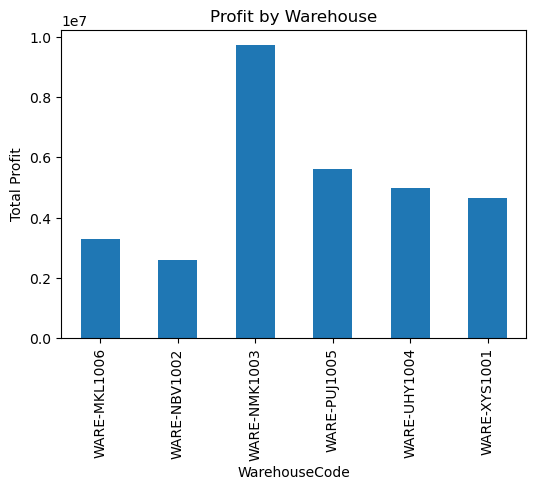

In [13]:
profit_by_warehouse = df.groupby('WarehouseCode')['Profit'].sum()
#visualize results
plt.figure(figsize=(6, 4))
profit_by_warehouse.plot(kind='bar')
plt.title('Profit by Warehouse')
plt.xlabel('WarehouseCode')
plt.ylabel('Total Profit')
plt.show()

In [14]:
profit_by_warehouse

WarehouseCode
WARE-MKL1006    3271175.31
WARE-NBV1002    2603498.52
WARE-NMK1003    9752551.97
WARE-PUJ1005    5606306.60
WARE-UHY1004    4986857.90
WARE-XYS1001    4653343.27
Name: Profit, dtype: float64

(iii) Profits by Sales Team

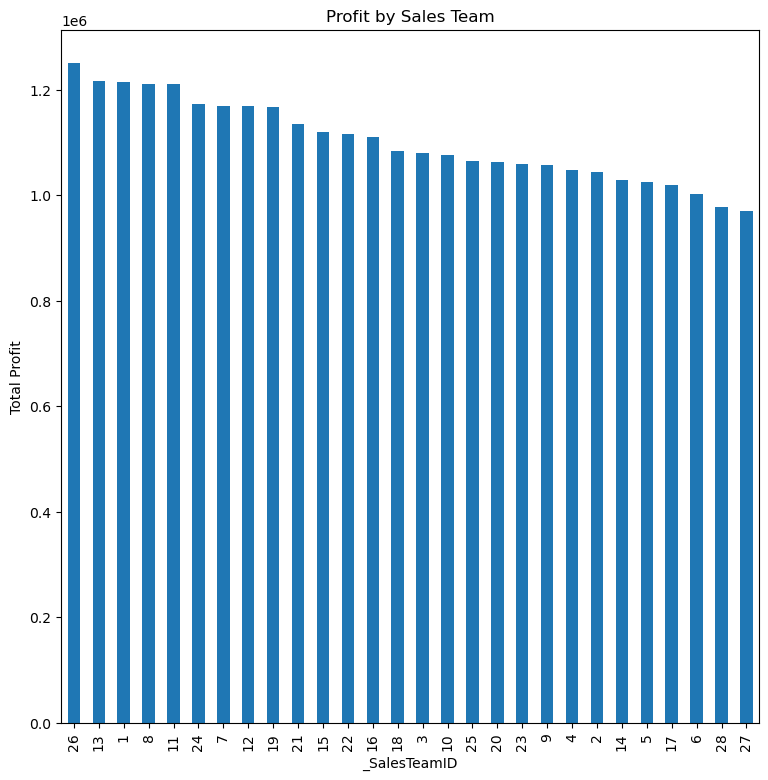

In [34]:
profit_by_salesteam = df.groupby('_SalesTeamID')['Profit'].sum()
profit_by_salesteam = profit_by_salesteam.sort_values(ascending=False)  # Sort by total profit
#visualize results
plt.figure(figsize=(9, 9))
profit_by_salesteam.plot(kind='bar')
plt.title('Profit by Sales Team')
plt.xlabel('_SalesTeamID')
plt.ylabel('Total Profit')
plt.show()

In [35]:
#team with highest profits
profit_by_salesteam.head(5)

_SalesTeamID
26    1251508.89
13    1217308.34
1     1214725.74
8     1210659.88
11    1210615.64
Name: Profit, dtype: float64

In [36]:
#team with least profits
profit_by_salesteam.tail(5)

_SalesTeamID
5     1025421.27
17    1020561.20
6     1003062.15
28     977437.51
27     969909.44
Name: Profit, dtype: float64

(iv) Profits by Product

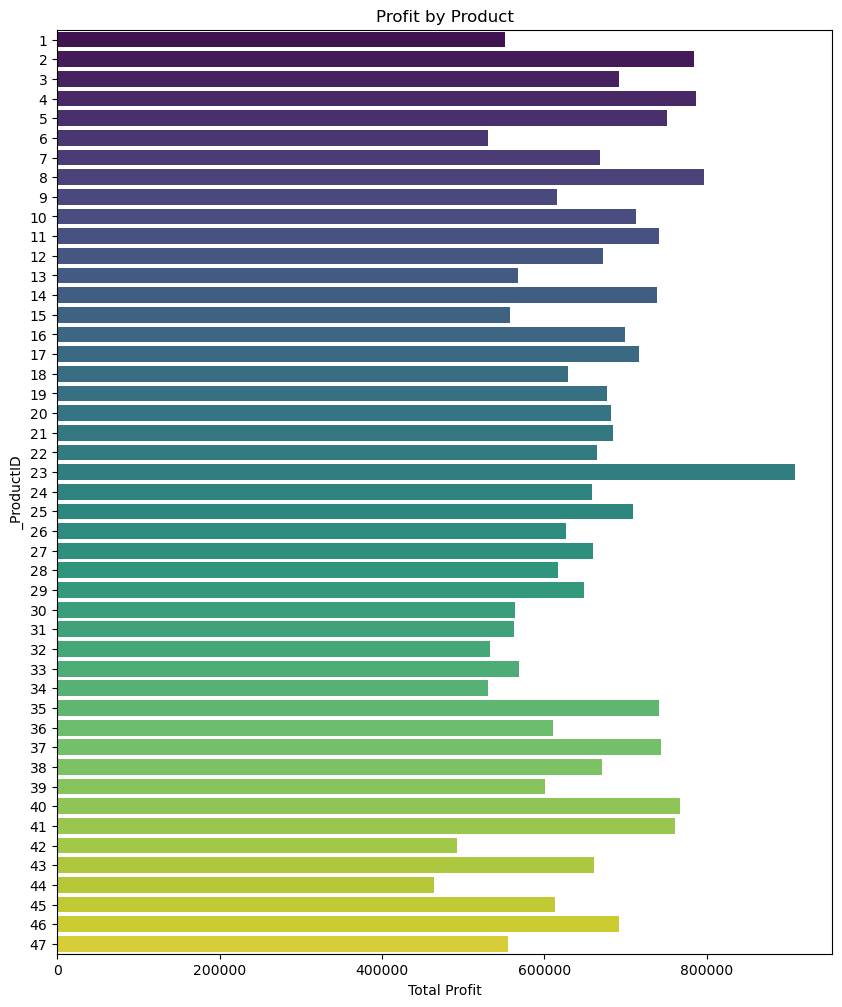

In [30]:
profit_by_product = round(df.groupby('_ProductID')['Profit'].sum().sort_values(ascending=False),2)
#visualize results
plt.figure(figsize=(10, 12))  # Adjust the figsize for horizontal orientation
sns.barplot(x=profit_by_product.values, y=profit_by_product.index, orient='h', palette='viridis')
plt.title('Profit by Product')
plt.xlabel('Total Profit')
plt.ylabel('_ProductID')
plt.show()

In [31]:
#MOST profitable products
profit_by_product.sort_values(ascending=False).head(5)

_ProductID
23    908796.92
8     796012.39
4     786251.96
2     783579.52
40    767257.42
Name: Profit, dtype: float64

In [32]:
#LEAST profitable products
profit_by_product.sort_values(ascending=False).tail(5)

_ProductID
32    532454.40
34    530240.72
6     530115.64
42    491842.64
44    463865.46
Name: Profit, dtype: float64

In [54]:
#what is our average profit per product
profit_by_product=round(profit_by_product.mean(),2)
profit_by_product

656887.95

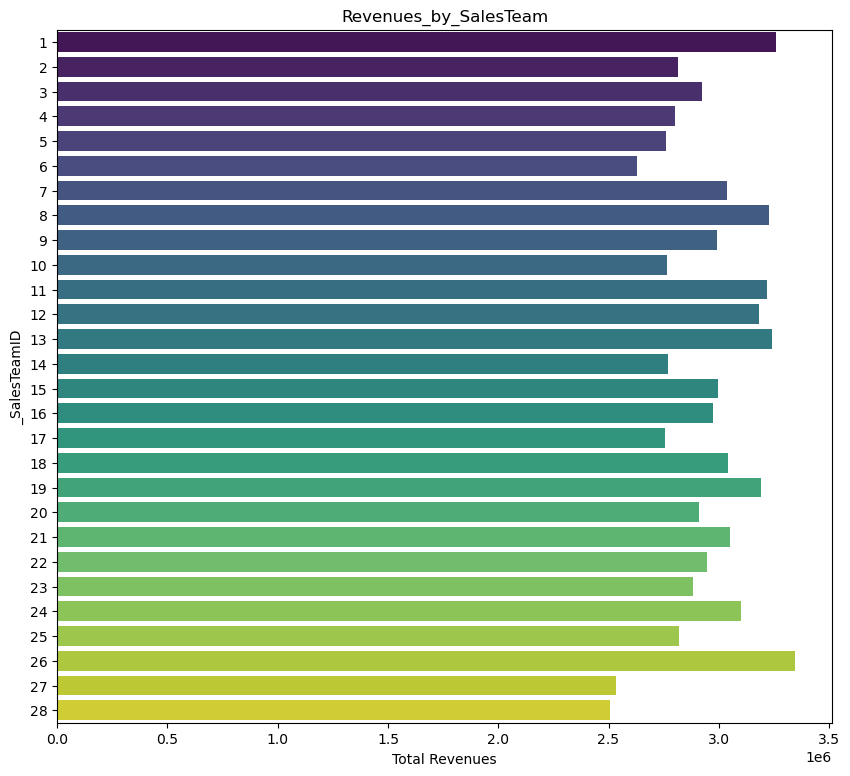

In [38]:
#let's see revenues generated by each sales team
Revenues_by_SalesTeam = round(df.groupby('_SalesTeamID')['Revenues'].sum().sort_values(ascending=False),2)
#visualize results
plt.figure(figsize=(10, 9))  # Adjust the figsize for horizontal orientation
sns.barplot(x=Revenues_by_SalesTeam.values, y=Revenues_by_SalesTeam.index, orient='h', palette='viridis')
plt.title('Revenues_by_SalesTeam')
plt.xlabel('Total Revenues')
plt.ylabel('_SalesTeamID')
plt.show()

**Reveues Analysis**

In [39]:
#team with MOST revenues
Revenues_by_SalesTeam.sort_values(ascending=False)
Revenues_by_SalesTeam.head(5)

_SalesTeamID
26    3346536.45
1     3261320.60
13    3242484.79
8     3228766.29
11    3217158.92
Name: Revenues, dtype: float64

In [40]:
#team with LEAST revenues
Revenues_by_SalesTeam.sort_values(ascending=False)
Revenues_by_SalesTeam.tail(5)

_SalesTeamID
5     2762652.16
17    2757821.67
6     2630334.60
27    2535766.05
28    2505294.15
Name: Revenues, dtype: float64

**GROWTH PATTERNS**

Let's deduce growth patterns of key fields such as profits to map out trends/patterns.

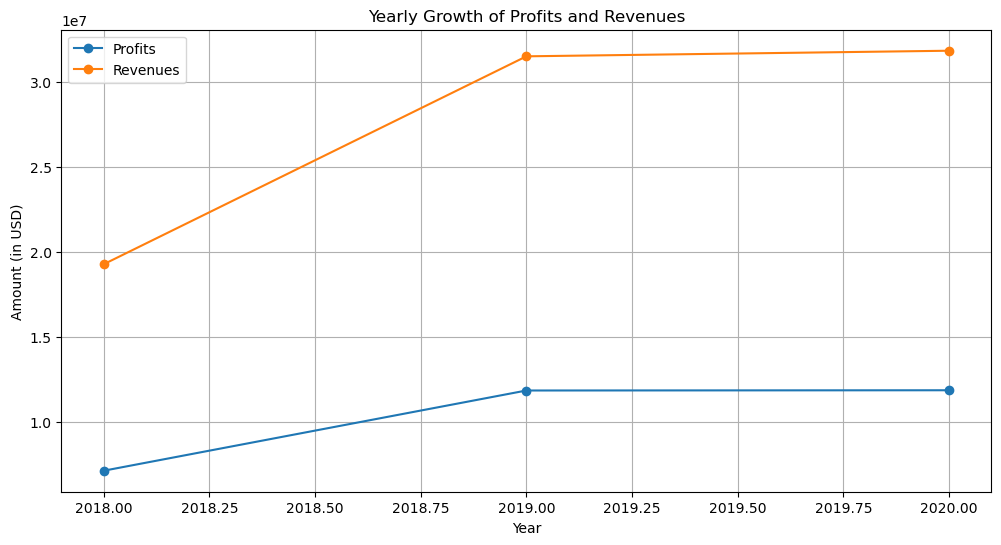

In [59]:
#let's see growth patterns of profits and revenues
# Group by the year of OrderDate and calculate the total profits and revenues for each year
yearly_data = df.groupby(df['OrderDate'].dt.year)[['Profit', 'Revenues']].sum()

# Plot the yearly growth of profits
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['Profit'], marker='o', label='Profits', linestyle='-')

# Plot the yearly growth of revenues
plt.plot(yearly_data.index, yearly_data['Revenues'], marker='o', label='Revenues', linestyle='-')

# Customize the plot
plt.title('Yearly Growth of Profits and Revenues')
plt.xlabel('Year')
plt.ylabel('Amount (in USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [60]:
yearly_data

,Profit,Revenues
OrderDate,,
2018,7137901.18,19293283.95
2019,11860713.10,31534438.97
2020,11875119.29,31864079.53


C:\Users\raymo\AppData\Local\Temp\ipykernel_5252\4097547416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['OrderDate'].dt.year


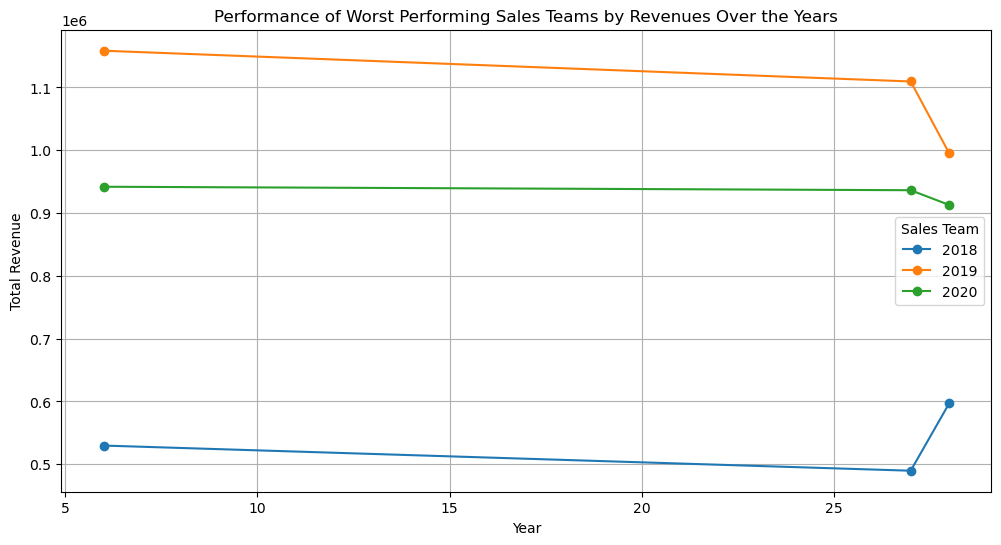

In [66]:
#let's visualize performance of the worst performing teams year-year
# Filter the data for the specific sales teams (_SalesTeamID 6, 27, 28)
teams_to_plot = [6, 27, 28]
filtered_data = df[df['_SalesTeamID'].isin(teams_to_plot)]

# Extract the year from the 'OrderDate' column
filtered_data['Year'] = filtered_data['OrderDate'].dt.year

# Group by '_SalesTeamID' and 'Year' and calculate the sum of revenues
revenues_by_team = filtered_data.groupby(['_SalesTeamID', 'Year'])['Revenues'].sum().unstack()

# Plot the results
plt.figure(figsize=(12, 6))
revenues_by_team.plot(marker='o', linestyle='-', ax=plt.gca())[]
plt.title('Performance of Worst Performing Sales Teams by Revenues Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Team', loc='best')
plt.grid()
plt.show()

C:\Users\raymo\AppData\Local\Temp\ipykernel_5252\779043163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['OrderDate'].dt.year


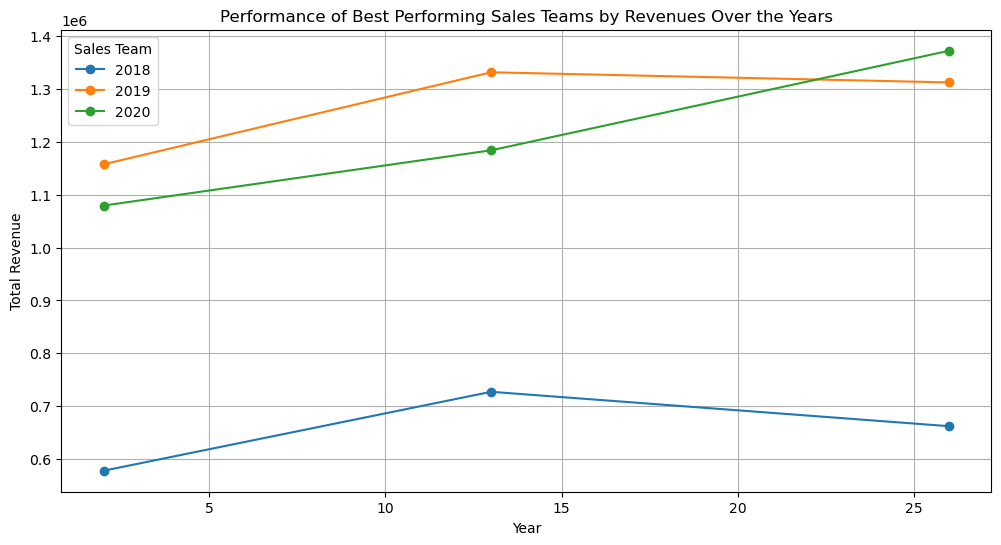

In [67]:
#visualize the top three
teams_to_plot = [26, 2, 13]
filtered_data = df[df['_SalesTeamID'].isin(teams_to_plot)]
# Extract the year from the 'OrderDate' column
filtered_data['Year'] = filtered_data['OrderDate'].dt.year

# Group by '_SalesTeamID' and 'Year' and calculate the sum of revenues
revenues_by_team = filtered_data.groupby(['_SalesTeamID', 'Year'])['Revenues'].sum().unstack()

# Plot the results
plt.figure(figsize=(12, 6))
revenues_by_team.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Performance of Best Performing Sales Teams by Revenues Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Team', loc='best')
plt.grid()
plt.show()

Product Growth- let's deduce performance of the wost selling products

C:\Users\raymo\AppData\Local\Temp\ipykernel_8412\202322466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['OrderDate'].dt.year


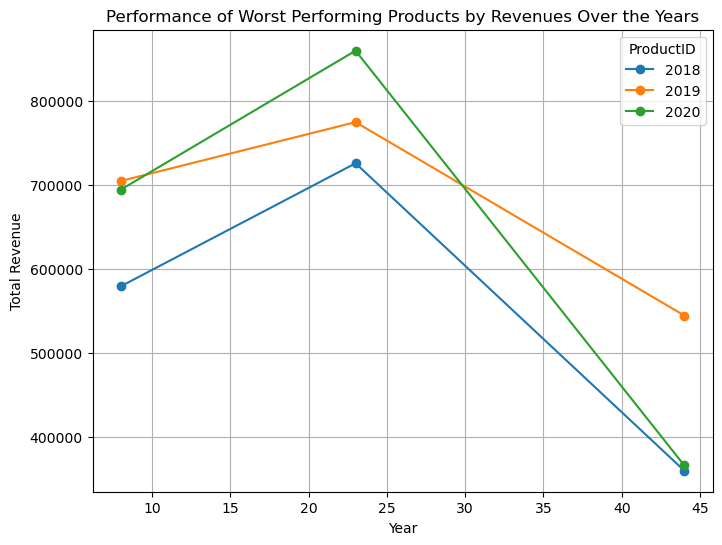

In [17]:
#let's visualize sales growth of the least profitable goods
slowest_products = [42, 44]
filtered_data = df[df['_ProductID'].isin(slowest_products)]

# Extract the year from the 'OrderDate' column
filtered_data['Year'] = filtered_data['OrderDate'].dt.year

# Group by '_SalesTeamID' and 'Year' and calculate the sum of revenues
revenues_by_product = filtered_data.groupby(['_ProductID', 'Year'])['Revenues'].sum().unstack()

# Plot the results
plt.figure(figsize=(8, 6))
revenues_by_team.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Performance of Worst Performing Products by Revenues Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='ProductID', loc='best')
plt.grid()
plt.show()

C:\Users\raymo\AppData\Local\Temp\ipykernel_8412\3118997117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['OrderDate'].dt.year


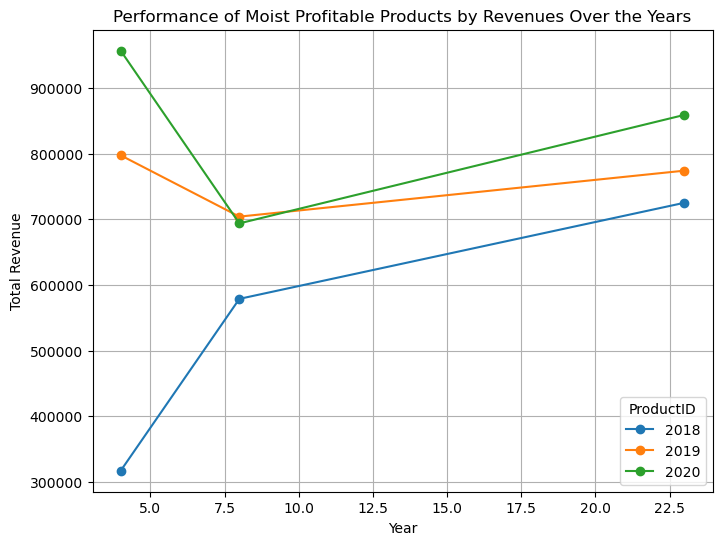

In [25]:
#let's visualize sales growth of the most profitable goods
most_profitable_products = [23,8,4]
filtered_data = df[df['_ProductID'].isin(most_profitable_products)]

# Extract the year from the 'OrderDate' column
filtered_data['Year'] = filtered_data['OrderDate'].dt.year

# Group by '_SalesTeamID' and 'Year' and calculate the sum of revenues
revenues_by_profitable_product = filtered_data.groupby(['_ProductID', 'Year'])['Revenues'].sum().unstack()

# Plot the results
plt.figure(figsize=(8, 6))
revenues_by_profitable_product.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Performance of Moist Profitable Products by Revenues Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='ProductID', loc='best')
plt.grid()
plt.show()

<Figure size 1400x800 with 0 Axes>

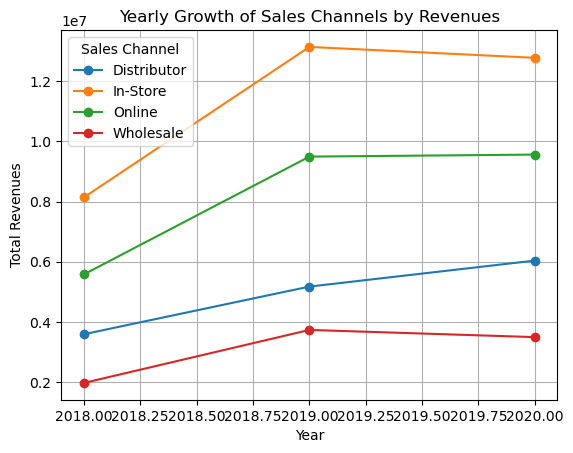

In [30]:
#let's see sales channels' growth over the years
# Extract the year from 'OrderDate'
df['Year'] = df['OrderDate'].dt.year
# Group data by 'Sales Channel' and 'Year' and calculate total revenues
revenues_by_channel = df.groupby(['Sales Channel', 'Year'])['Revenues'].sum().unstack().T

# Visualize the results
plt.figure(figsize=(14, 8))
revenues_by_channel.plot(kind='line', marker='o')
plt.title('Yearly Growth of Sales Channels by Revenues')
plt.xlabel('Year')
plt.ylabel('Total Revenues')
plt.legend(title='Sales Channel', loc='best')
plt.grid(True)
plt.show()

In [31]:
revenues_by_channel

Sales Channel,Distributor,In-Store,Online,Wholesale
Year,,,,
2018,3595087.93,8138611.85,5581678.82,1977905.35
2019,5175817.68,13131425.94,9490426.32,3736769.03
2020,6038845.17,12769696.45,9557365.58,3498172.33


**CUSTOMER EXPERIENCE ANALYSIS**

Now let's analyze the time associated fields e.g., Delivery time in regards to all sales channels and warehouses.

(a)Inventory turnover time.

In [56]:
#deduce average turnover time for sales channels

# Calculate the average inventory turnover time for each Sales Channel
average_inventory_turnover = df.groupby('Sales Channel')['Inventory_turnover_time'].mean().reset_index()
average_inventory_turnover.sort_values(by='Inventory_turnover_time',ascending=True)

,Sales Channel,Inventory_turnover_time
3,Wholesale,143.258679
2,Online,147.900206
0,Distributor,149.893091
1,In-Store,149.985749


In [55]:
#deduce for each warehouse
# Calculate the average inventory turnover time for each warehouse
warehouse_average_inventory_turnover = df.groupby('WarehouseCode')['Inventory_turnover_time'].mean().reset_index()
warehouse_average_inventory_turnover.sort_values(by='Inventory_turnover_time',ascending=True)

,WarehouseCode,Inventory_turnover_time
0,WARE-MKL1006,142.786464
4,WARE-UHY1004,143.014229
1,WARE-NBV1002,149.448625
2,WARE-NMK1003,150.002794
5,WARE-XYS1001,151.141571
3,WARE-PUJ1005,151.855272


(b)Fulfillment time

In [60]:
# Calculate the average Fulfillment time for each sales channel
SalesChannel_average_fulfillment_time = df.groupby('Sales Channel')['Fulfillment_time'].mean().reset_index()
SalesChannel_average_fulfillment_time.sort_values(by='Fulfillment_time',ascending=True)

,Sales Channel,Fulfillment_time
1,In-Store,88.912371
3,Wholesale,89.612542
2,Online,90.886598
0,Distributor,91.696727


In [61]:
# Calculate the average Fulfillment time for each warehouse
Warehouse_average_fulfillment_time = df.groupby('WarehouseCode')['Fulfillment_time'].mean().reset_index()
Warehouse_average_fulfillment_time.sort_values(by='Fulfillment_time',ascending=True)

,WarehouseCode,Fulfillment_time
5,WARE-XYS1001,86.709493
1,WARE-NBV1002,86.790159
4,WARE-UHY1004,88.681423
0,WARE-MKL1006,90.292882
2,WARE-NMK1003,90.421956
3,WARE-PUJ1005,94.926947


In [14]:
#analyze delivery times by sales channels to see which channel is a cx most likely to get their goods fastest
SalesChannel_average_delivery_time = df.groupby('Sales Channel')['Delivery_time'].mean().reset_index()
SalesChannel_average_delivery_time.sort_values(by='Delivery_time',ascending=True)

,Sales Channel,Delivery_time
0,Distributor,85.687273
3,Wholesale,86.937290
1,In-Store,86.943905
2,Online,90.611546


**CUSTOMER NUMBER COMPARISON**

Let's deduce number of customers each sales channel, team and warehouse have to establish if the numbers matter

In [26]:
Number_of_customers_by_channel = df.groupby('Sales Channel')['_CustomerID'].sum().reset_index()
Number_of_customers_by_channel.sort_values(by='_CustomerID',ascending=False)

,Sales Channel,_CustomerID
1,In-Store,83778
2,Online,62253
0,Distributor,34775
3,Wholesale,22621


In [43]:
#deduce number of customers by sales teams
Number_of_customers_by_team = df.groupby('_SalesTeamID')['_CustomerID'].sum().reset_index()

#team with HIGHEST customers
Number_of_customers_by_team.sort_values(by='_CustomerID',ascending=False).head(5)

,_SalesTeamID,_CustomerID
12,13,8617
17,18,8427
7,8,8119
0,1,8077
11,12,7816


In [44]:
#team with LEAST customers
Number_of_customers_by_team.sort_values(by='_CustomerID',ascending=False).tail(5)

,_SalesTeamID,_CustomerID
26,27,6630
9,10,6542
24,25,6362
27,28,6252
1,2,6243
